# 机器学习实践

作者：杨岱川

时间：2019年11月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

参考代码：

- [A CLUSTER OF COLORS - Principal Component Analysis](https://www.kaggle.com/arthurtok/a-cluster-of-colors-principal-component-analysis)
- [Feature Extraction](https://www.kaggle.com/pierpaolo28/feature-extraction)

## 实践说明

### 数据集

>地址：[蘑菇分类数据集](https://github.com/DrDavidS/basic_Machine_Learning/tree/master/datasets/Mushroom%20Classification)

加州大学欧文（尔湾）分校在1987年贡献出了这份数据集，其内容是根据《National Audubon Society Field Guide to North American Mushrooms》一书中对姬松茸（Agaricus）属和大环柄菇（Lepiota）属中23个种的假想样本描述生成的。


<img src="https://images-cn.ssl-images-amazon.com/images/I/51a7HxdXlaL._SX259_BO1,204,203,200_.jpg" width="200" alt="书" align=center>

<center>《National Audubon Society Field Guide to North American Mushrooms》</center>

<img src="https://gss3.bdstatic.com/7Po3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=43f5b732c1ef7609280691cd4fb4c8a9/5366d0160924ab18d82a52983ffae6cd7b890b64.jpg" width="200" alt="干的姬松茸" align=center>

<center>干的姬松茸</center>

<img src="https://gss3.bdstatic.com/7Po3dSag_xI4khGkpoWK1HF6hhy/baike/w%3D268%3Bg%3D0/sign=d8f6f8cdc83d70cf4cfaad0bc0e7b63d/f31fbe096b63f624cca893f78644ebf81b4ca349.jpg" width="200" alt="大环柄菇" align=center>

<center>大环柄菇</center>

这些蘑菇有的是可以食用的，用的则是有毒的，还有一些是安全性不明的。我们把安全性不明的和有毒的蘑菇通通算作是不可以食用的类别。因此这是一个**二分类**任务。

>在书中明确指出，没有简单的规则能确定蘑菇的可使用性。好比“鲜艳漂亮的蘑菇一定有毒”是错误的规则一样。

因此，我们将利用利用决策树，及决策树衍生出的各种更成熟高效的机器学习方法来对一个这个的数据集进行分类实验。

## 数据探索性分析

别忘了，拿到数据第一步是分析数据，而不是着急套用算法。

### 1. 读取并查看数据

我们使用 [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) 来读取 `.csv` 格式的数据。

In [1]:
import logging

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
logging.getLogger().setLevel(logging.INFO)
pd.set_option('display.max_columns', None)  # 显示所有列

In [2]:
mushrooms = pd.read_csv("../datasets/Mushroom Classification/mushrooms.csv", encoding='utf-8')

In [3]:
mushrooms.shape

(8124, 23)

In [4]:
mushrooms  # 查看DataFrame

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [5]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


使用 `DataFrame.describe()` 函数来粗略描绘数据。

从上面的表格得知，这份蘑菇数据集中，

- 每个蘑菇样本有23个特征（features）；
- 每个特征都是分类值（categorical values）；
- 共有8124个蘑菇样本（实例）；

首先我们需要明白特征的标题含义：

Attribute Information:

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
- bruises?: bruises=t,no=f 
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
- gill-attachment: attached=a,descending=d,free=f,notched=n 
- gill-spacing: close=c,crowded=w,distant=d 
- gill-size: broad=b,narrow=n 
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
- stalk-shape: enlarging=e,tapering=t 
- stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
- veil-type: partial=p,universal=u 
- veil-color: brown=n,orange=o,white=w,yellow=y 
- ring-number: none=n,one=o,two=t 
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
- population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
- habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

其中，

- **cap**：菌盖
- **bruises**：淤痕？
- **odor**：气味
- **gill**：菌褶
- **stalk**：菌柄
- **veil**：菌幕
- **ring**：菌环
- **spore-print-color**：孢子印颜色
- **population**：种群数目分布
- **babitat**：栖息地

### 2. 颜色特征编码

我们从颜色特征开始分析，先挑选出其中的颜色特征。

In [6]:
color_features = []

# 遍历所有列标题，如果带有"color"字样的，放入color_features中
for column in mushrooms.columns:
    if 'color' in column:
        color_features.append(column)

# 建立一个蘑菇数据集子集
data_color = mushrooms[color_features]
data_color.head()

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,n,k,w,w,w,k
1,y,k,w,w,w,n
2,w,n,w,w,w,n
3,w,n,w,w,w,k
4,g,k,w,w,w,n


由于我们的各种算法是不接受 `string` 类型输入的，所以我们必须将这些颜色先进行编码。

我们使用 [sklearn.preprocessing.LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 进行编码，这是一个专门用于将分类特征值转变为整数类别的编码函数。

而且，出于颜色通用的考量，一个特征的颜色如果与另一个特征的颜色相同，那么它们的编码可以是设为一致的。

In [7]:
from sklearn.preprocessing import LabelEncoder

values = data_color.values  # 提取values形成矩阵
values = values.ravel()  # 摊平成一维
values = pd.Series(data_color.values.ravel())  # 转变为Series
ListToEncode = values.unique()  # 去重

EncodedList = LabelEncoder().fit_transform(ListToEncode)  # 编码

print("ListToEncode:", ListToEncode)  # 显示去重后的颜色
print("EncodedList:", EncodedList)  # 显示颜色对应的编码

ListToEncode: ['n' 'k' 'w' 'y' 'g' 'p' 'u' 'h' 'e' 'b' 'r' 'c' 'o']
EncodedList: [ 6  5 11 12  3  8 10  4  2  0  9  1  7]


In [8]:
# 建立颜色和编码对应的字典
encodedict = {}
for i in range(0, len(EncodedList)):
    encodedict.update({ListToEncode[i]:EncodedList[i]})

encodedict

{'n': 6,
 'k': 5,
 'w': 11,
 'y': 12,
 'g': 3,
 'p': 8,
 'u': 10,
 'h': 4,
 'e': 2,
 'b': 0,
 'r': 9,
 'c': 1,
 'o': 7}

In [9]:
# 替换datafram中的颜色
for i in range(len(data_color.columns)):
    for j in range(data_color.shape[0]):
        data_color.values[j][i] =  encodedict[data_color.values[j][i]]  # 挨个替换

In [10]:
data_color.head() 

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,6,5,11,11,11,5
1,12,5,11,11,11,6
2,11,6,11,11,11,6
3,11,6,11,11,11,5
4,3,5,11,11,11,6


### 3. 检查颜色特征的相关性

在[《2.04 特征的统计学检查》](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/杭电机器学习课程及代码/2.04%20特征的统计学检查.ipynb)中，我们学习过相关性分析的基本概念和实践。

>回忆一下相关性系数是做什么的？有哪些常用的相关性系数？

-----------------------

在这里，我们将使用**Spearman相关性系数**进行分析，构建一个相关性矩阵。

>也可以使用**Pearson相关性系数**。

然后我们将绘制一个热力图。

In [11]:
data_color = data_color.astype(float)  # 必须把数据类型由int转换为float

spearman = data_color.corr(method='spearman')
spearman

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,0.090599,0.100604,0.106080,-0.032460,-0.237945
gill-color,0.090599,1.000000,0.002688,-0.020841,-0.098138,-0.318392
stalk-color-above-ring,0.100604,0.002688,1.000000,0.587233,0.182324,0.266850
stalk-color-below-ring,0.106080,-0.020841,0.587233,1.000000,0.176781,0.248712
veil-color,-0.032460,-0.098138,0.182324,0.176781,1.000000,-0.025070
spore-print-color,-0.237945,-0.318392,0.266850,0.248712,-0.025070,1.000000


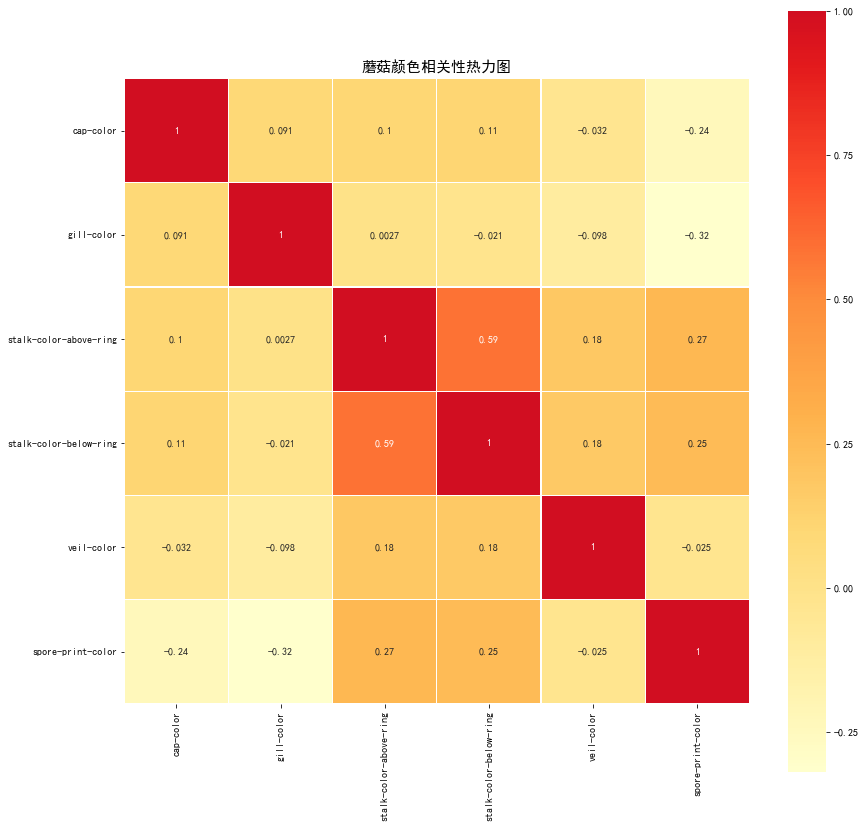

In [12]:
# 画布大小
plt.figure(figsize=(14,14))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('蘑菇颜色相关性热力图', size=15)

# 绘制热力图
sns.heatmap(data_color.corr(method='spearman'),  # 数据，dataframe
            linewidths=0.1,  # 隔断线的宽度
            vmax=1.0,  # 锚定色彩映射的值
            center=0.5,  #  色彩映射的最终值
            square=True,  # 正方形
            cmap='YlOrRd',  # 预设色彩类型
            linecolor='white', # 隔断线的色彩
            annot=True)

### 4. 检查类别分布

首先检查蘑菇数据的类别是否分布平衡？这里“平衡”指的是“可食用”和“不可食用”接近 “1:1” 。

In [13]:
class_data = pd.Series(mushrooms['class']).value_counts()
class_data

e    4208
p    3916
Name: class, dtype: int64

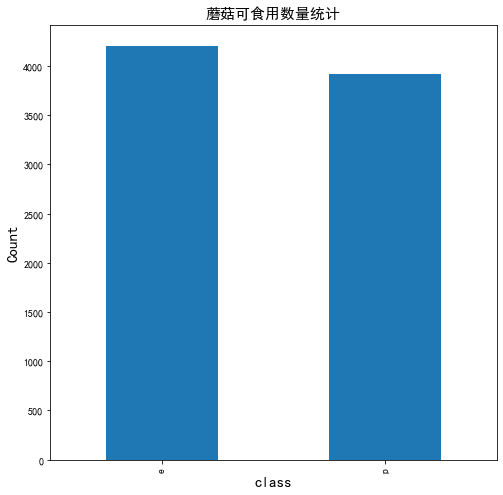

In [14]:
# 图片大小
plt.figure(figsize=(8,8))

# 字体（可选）
font = {
        'family' : 'SimHei',
        'weight' : 'normal',
        'size'   : 15}

class_data = class_data.plot(kind = 'bar')  # 条状图
plt.ylabel("Count", font)
plt.xlabel("class", font)

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("蘑菇可食用数量统计", size=15);

还可以检查一下其他特征的平衡性，比如“菌盖颜色”：

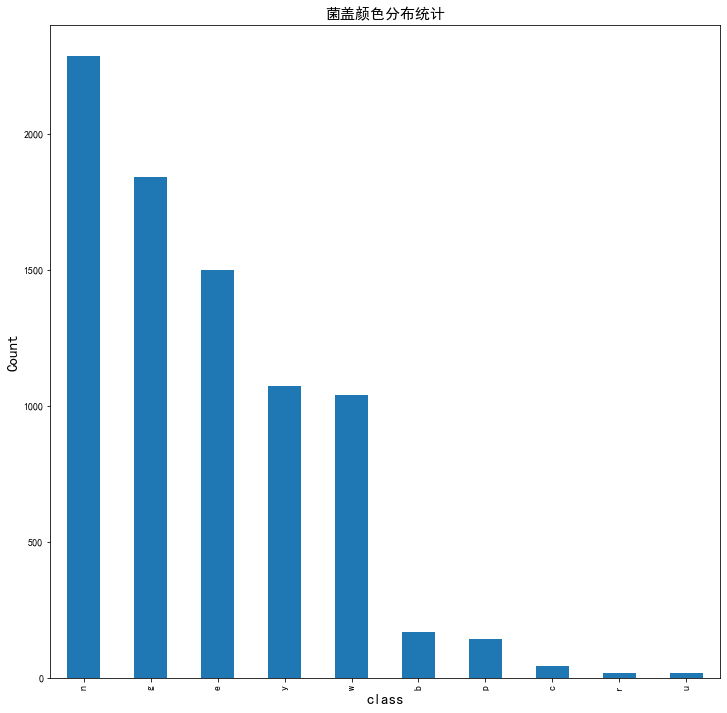

In [15]:
class_data = pd.Series(mushrooms['cap-color']).value_counts()
class_data

# 图片大小
plt.figure(figsize=(12,12))

# 字体（可选）
font = {
        'family' : 'SimHei',
        'weight' : 'normal',
        'size'   : 15}

class_data = class_data.plot(kind = 'bar')  # 条状图
plt.ylabel("Count", font)
plt.xlabel("class", font)

# brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("菌盖颜色分布统计", size=15);

可以看出，“棕色”（n）的菌盖数量最多，“绿色”（r）数量最少

### 5.  缺失值分析

一个数据集，由于数据搜集渠道、搜集时间或者搜集对象等各方面的不同，很容易产生缺失值，从而对数据分析结果产生很大的干扰。

最理想的情况就是在搜集数据的源头就做到尽量没有缺漏，或者及时查漏补缺，但是在实际生产和生活中，做到这点是很困难的。

在数据的探索性分析中，我们也有必要检查数据是否存在缺失值。

#### 5.1. 普通缺失值

很多情况下，缺失值是直接以null或者Nan的形式体现在 Dataframe 中的。

我们可以使用 `DataFrame.isnull().any()` 来对每个特征进行初步判断，如果返回值中存在 `True` 则说明该列有空值。 

In [16]:
check = mushrooms.isnull().any()
print(check)

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool


#### 5.2. 被填充过的缺失值

在有些情况下，数据集是缺失的，但是由于某些原因导致我们在拿到数据集的时候，缺失值已经被特殊的值填充了。

填充缺失值的方法很多，常见情况有以下几种：

- `-1`填充缺失值
- `empty`等字符串填充缺失值
- `0`填充缺失值
- 平均数或者中位数等简单统计方法填充缺失值
- 其他人工经验规则
- 外部数据集补充

现在，我们先分析一下是否存在“被填补过”的缺失值。

In [17]:
for column in mushrooms.columns:
    current_column_values = mushrooms[column].values  # 当前列的所有取值
    current_column_values = pd.Series(current_column_values)  # 变成Series格式
    current_column_values = current_column_values.unique()  # 去重
    print(column, "特征所包含的取值： ", current_column_values)

class 特征所包含的取值：  ['p' 'e']
cap-shape 特征所包含的取值：  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 特征所包含的取值：  ['s' 'y' 'f' 'g']
cap-color 特征所包含的取值：  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 特征所包含的取值：  ['t' 'f']
odor 特征所包含的取值：  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 特征所包含的取值：  ['f' 'a']
gill-spacing 特征所包含的取值：  ['c' 'w']
gill-size 特征所包含的取值：  ['n' 'b']
gill-color 特征所包含的取值：  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 特征所包含的取值：  ['e' 't']
stalk-root 特征所包含的取值：  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 特征所包含的取值：  ['s' 'f' 'k' 'y']
stalk-surface-below-ring 特征所包含的取值：  ['s' 'f' 'y' 'k']
stalk-color-above-ring 特征所包含的取值：  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 特征所包含的取值：  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 特征所包含的取值：  ['p']
veil-color 特征所包含的取值：  ['w' 'n' 'o' 'y']
ring-number 特征所包含的取值：  ['o' 't' 'n']
ring-type 特征所包含的取值：  ['p' 'e' 'l' 'f' 'n']
spore-print-color 特征所包含的取值：  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 特征所包含的取值：  

注意，在上面的特征中，存在一个问号 `?`，这个问号在之前的数据描述中是有被提到过的，这是指一些蘑菇的 “stalk-root”是 `missing` 状态，可以视作为意料之中的空值。

现在看看这个 `?` 有多少：

In [18]:
check_missing = mushrooms[mushrooms['stalk-root'] == '?']
check_missing

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,e,?,s,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,e,?,s,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,t,?,k,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,t,?,s,s,p,p,p,w,o,e,w,v,l
4196,p,x,y,n,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
4200,p,x,y,n,f,y,f,c,n,b,t,?,s,k,p,w,p,w,o,e,w,v,l
4283,e,f,s,p,t,n,f,c,b,e,e,?,s,s,w,w,p,w,t,e,w,c,w
4291,e,k,s,p,t,n,f,c,b,e,e,?,s,s,w,e,p,w,t,e,w,c,w
4326,e,x,y,r,f,n,f,c,n,p,e,?,s,f,w,w,p,w,o,f,h,v,d


总共有2480个蘑菇的“stalk-root” 特征是 `missing`。

### 6. 数据清洗

当我们完成了对数据的探索性分析后，剩下的就是特征工程和对数据的清洗了。

在本小节中，由于没有复杂多变而不符合规则的数据，所以**数据清洗**非常简单，目的就是为了让机器学习方法可以顺利识别数据集。

我们所采用的方法就是利用 `LabelEncoder` 把各种类别字母替换为整数数字。

简单起见，这里不考虑特征含义重复等问题，例如不同特征的 `w` 值可能代表相同或者不同的意思。

In [19]:
new_mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
new_mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


## 算法应用

本节主要讲述如何快速应用各种现有的（基于树模型的）算法框架对数据进行建模。

### 1. 训练集和测试集分离

由于蘑菇数据集本身并没有提供训练集、验证集、测试集的分割，所以我们需要手动完成这个工作。

在 [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) 中，已经封装好了多种常用采用的数据集拆分工具。其中最常用也是最简单的当属 `sklearn.model_selection.train_test_split` 方法。

In [20]:
from sklearn.model_selection import KFold

我们采用 `KFold` 进行训练集和测试集的准备。这种方法相对 `train_test_split` 更加“平均”一些，但是编程会稍微复杂一点。

关于 `train_test_split` 的用法，在之前章节采用 iris 数据集时候已经演示过，这里不再赘述。

In [21]:
kf = KFold(n_splits=3, shuffle = True, random_state= 42)  # 这里简单起见，分成三个fold
kf.get_n_splits(new_mushrooms)
print(kf)

KFold(n_splits=3, random_state=42, shuffle=True)


In [22]:
for train_index, test_index in kf.split(new_mushrooms):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   1    2    3 ... 8121 8122 8123] TEST: [   0    8   14 ... 8116 8117 8119]
TRAIN: [   0    1    2 ... 8119 8120 8122] TEST: [   6    7   12 ... 8118 8121 8123]
TRAIN: [   0    6    7 ... 8119 8121 8123] TEST: [   1    2    3 ... 8112 8120 8122]


实际上这里 `KFold` 输出的只是随机折过三次的训练集和测试集的索引，所以我们需要在每一折单独训练一次。

------------------

### 2. 导入决策树

决策树函数的使用非常简单，我们将组合使用 `KFold` 和决策树方法。

>注意，一般用小写字母表示一列数据，而用大写字母表示多列数据。比如这里的 `X` 和 `y`。

In [23]:
from sklearn import tree
from sklearn.metrics import accuracy_score

for i,(train_index, test_index) in enumerate(kf.split(new_mushrooms)):
    print(f'第{i}折')
    # 存入训练集和测试集
    new_mushrooms_train, new_mushrooms_test = new_mushrooms.iloc[train_index, :], new_mushrooms.iloc[test_index, :]
    
    # 分开
    train_X = new_mushrooms_train.drop(['class'], axis=1)  # 删除 class 列，保留训练集特征
    train_y = new_mushrooms_train['class']  # 训练集标签
    test_X = new_mushrooms_test.drop(['class'], axis=1)  # 测试集特征 
    test_y = new_mushrooms_test['class']  # 测试集标签

    clf = tree.DecisionTreeClassifier()  # 决策树分类器
    clf = clf.fit(train_X,train_y)  # 训练
    pred_y = clf.predict(test_X)  # 预测
    
    acc = accuracy_score(test_y, pred_y)
    print(f'当前折准确率为{acc}')

第0折
当前折准确率为1.0
第1折
当前折准确率为1.0
第2折
当前折准确率为1.0


`sklearn.tree` 提供了 `plot_tree()` 方法，我们可以绘制出决策树，从中粗略得知每个特征的重要性（从gini可以看出）。

[Text(445.32692307692304, 1019.25, 'X[8] <= 3.5\nentropy = 0.5\nsamples = 5416\nvalue = [2767, 2649]'),
 Text(214.61538461538458, 883.35, 'X[20] <= 3.5\nentropy = 0.27\nsamples = 2215\nvalue = [356, 1859]'),
 Text(85.84615384615384, 747.45, 'X[19] <= 1.5\nentropy = 0.216\nsamples = 373\nvalue = [327, 46]'),
 Text(42.92307692307692, 611.55, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(128.76923076923077, 611.55, 'X[21] <= 0.5\nentropy = 0.068\nsamples = 339\nvalue = [327, 12]'),
 Text(85.84615384615384, 475.65, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(171.69230769230768, 475.65, 'entropy = 0.0\nsamples = 327\nvalue = [327, 0]'),
 Text(343.38461538461536, 747.45, 'X[10] <= 2.0\nentropy = 0.031\nsamples = 1842\nvalue = [29, 1813]'),
 Text(300.46153846153845, 611.55, 'X[12] <= 0.5\nentropy = 0.01\nsamples = 1822\nvalue = [9, 1813]'),
 Text(257.53846153846155, 475.65, 'X[4] <= 3.5\nentropy = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(214.61538461538458, 339.75, 'e

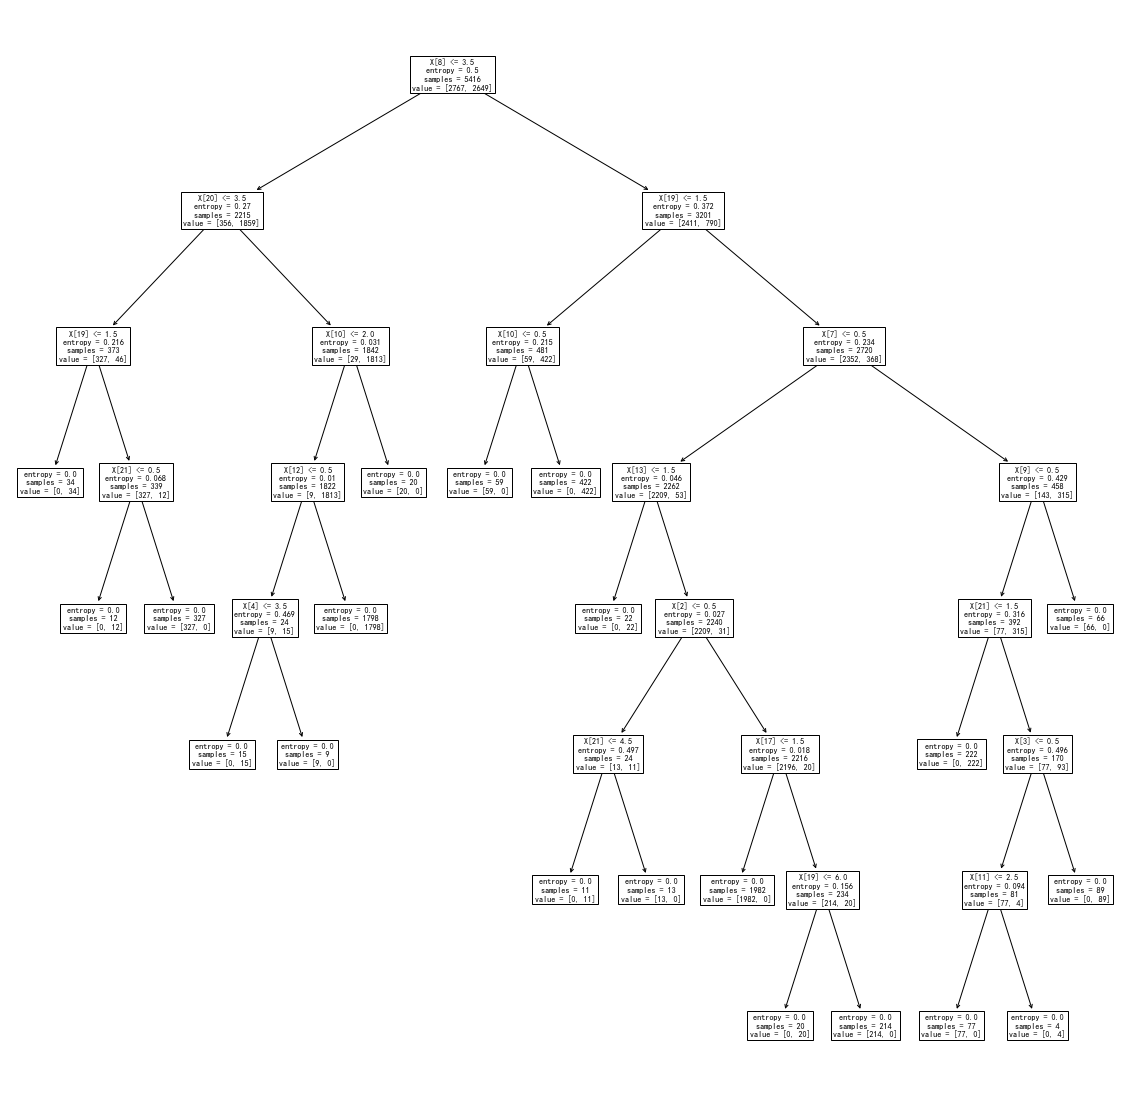

In [24]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf) 

从上面的信息可以看出，特征 `X[8]` 是最重要的，因为它的gini值最高。

### 3. 使用更强大的工具

决策树是最基本的算法，在实际工作中，我们有很多更强大的基于树模型改进的集成工具或者方法，比如 `RandomForest`、`XGBoost`、`LightGBM`、`CatBoost` 等等。

#### 随机森林

[随机森林](https://en.wikipedia.org/wiki/Random_forest)由 $n$ 棵决策树ensemble（组合）而成，每棵决策树从训练集中有放回地抽取一部分训练样本（子集），然后训练出各自的最佳分割。

单个决策树通常会倾向于过拟合，而在随机森林中，由于特征选择的随机性存在，可以缓解一部分特征误差，同时通过取这些决策树预测的平均值（平均投票），在一定程度上避免过拟合的发生。

随机森林详细的细节可以参考一些[博客](https://blog.csdn.net/qq_34106574/article/details/82016442)或者相关论坛/wiki百科 等，这里就不再详细叙述。

#### 随机森林实践

这里以 `sklearn.ensemble.RandomForestClassifier` 方法，也就是 SKlearn 自带的“随机森林分类器”为例子给大家演示一下操作方法。

首先还是训练集与测试集的拆分，使用  `sklearn.model_selection.train_test_split`:

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

new_mushrooms_X = new_mushrooms.drop(['class'], axis=1)  # 特征
new_mushrooms_y = new_mushrooms['class']  # 标签

X_train, X_test, y_train, y_test = train_test_split(new_mushrooms_X,  # 特征
                                                    new_mushrooms_y,  # 标签
                                                    test_size=0.3,  # 测试集数量比例
                                                    random_state=42)  # 随机种子

接下来使用 `RandomForestClassifier` 进行分类，其中设置了一些常用参数供参考，其他参数请看 [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 文档。

In [31]:
rf = RandomForestClassifier(n_estimators=100,  # 树的数量
                            max_depth=8,  # 最大树深度
                            min_samples_leaf=4,  # 叶节点处所需的最小样本数
                            max_features='auto',  # 单颗树最大特征数量
                            n_jobs=-1,  # 并行线程数量
                            random_state=0)  # 随机种子

In [32]:
rf.fit(X_train, y_train)  # 训练

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'当前准确率为{acc}')

当前准确率为1.0


### 4. 绘制特征重要性

在树模型中，我们还可以根据损失函数、信息熵、信息增益等数据绘制出特征重要性。

在 `RandomForestClassifier` 中有一个 `feature_importances_` 方法，允许我们输出随机森林分类器的特征重要性。

这里我们利用 `plotly` 绘图库来做绘图示例。

> 先在 PowerShell 中使用 `pip install plotly` 来安装。

In [34]:
import plotly.offline as py
import plotly.graph_objects as go

features = X_train.columns.values  # 特征名称

# 随机森林中每个变量的重要性
# Scatter plot
trace = go.Scatter(
    y = rf.feature_importances_,  # 特征重要性
    x = features,  # 特征名称
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

# 图像格式
layout= go.Layout(
    autosize= True,
    title= '蘑菇食用性特征重要性',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=True,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',  # 特征重要性
        showgrid=True,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

以上代码绘制出了随机森林模型的特征重要性。不过要注意的是，这个特征重要性仅仅代表算法本身的计算结果，可能和直觉、经验是相悖的，需要谨慎判断。

> 可以尝试根据特征重要性逆推出一些结论，比如“**为什么气味（odor）特征最重要**”？